# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
sns.set()

# Input Dataset

In [2]:
data = pd.read_csv('kidney_disease.csv')
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

# Drop ID

In [3]:
data = data.drop(['id'], axis =1)

# Check null value

In [4]:
total_missing = data.isnull().sum().sum()
total_entries = data.size
missing_percentage = (total_missing / total_entries) * 100
print(f"Percentage of missing values in the dataset: {missing_percentage:.2f}%")

Percentage of missing values in the dataset: 10.09%


In [5]:
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

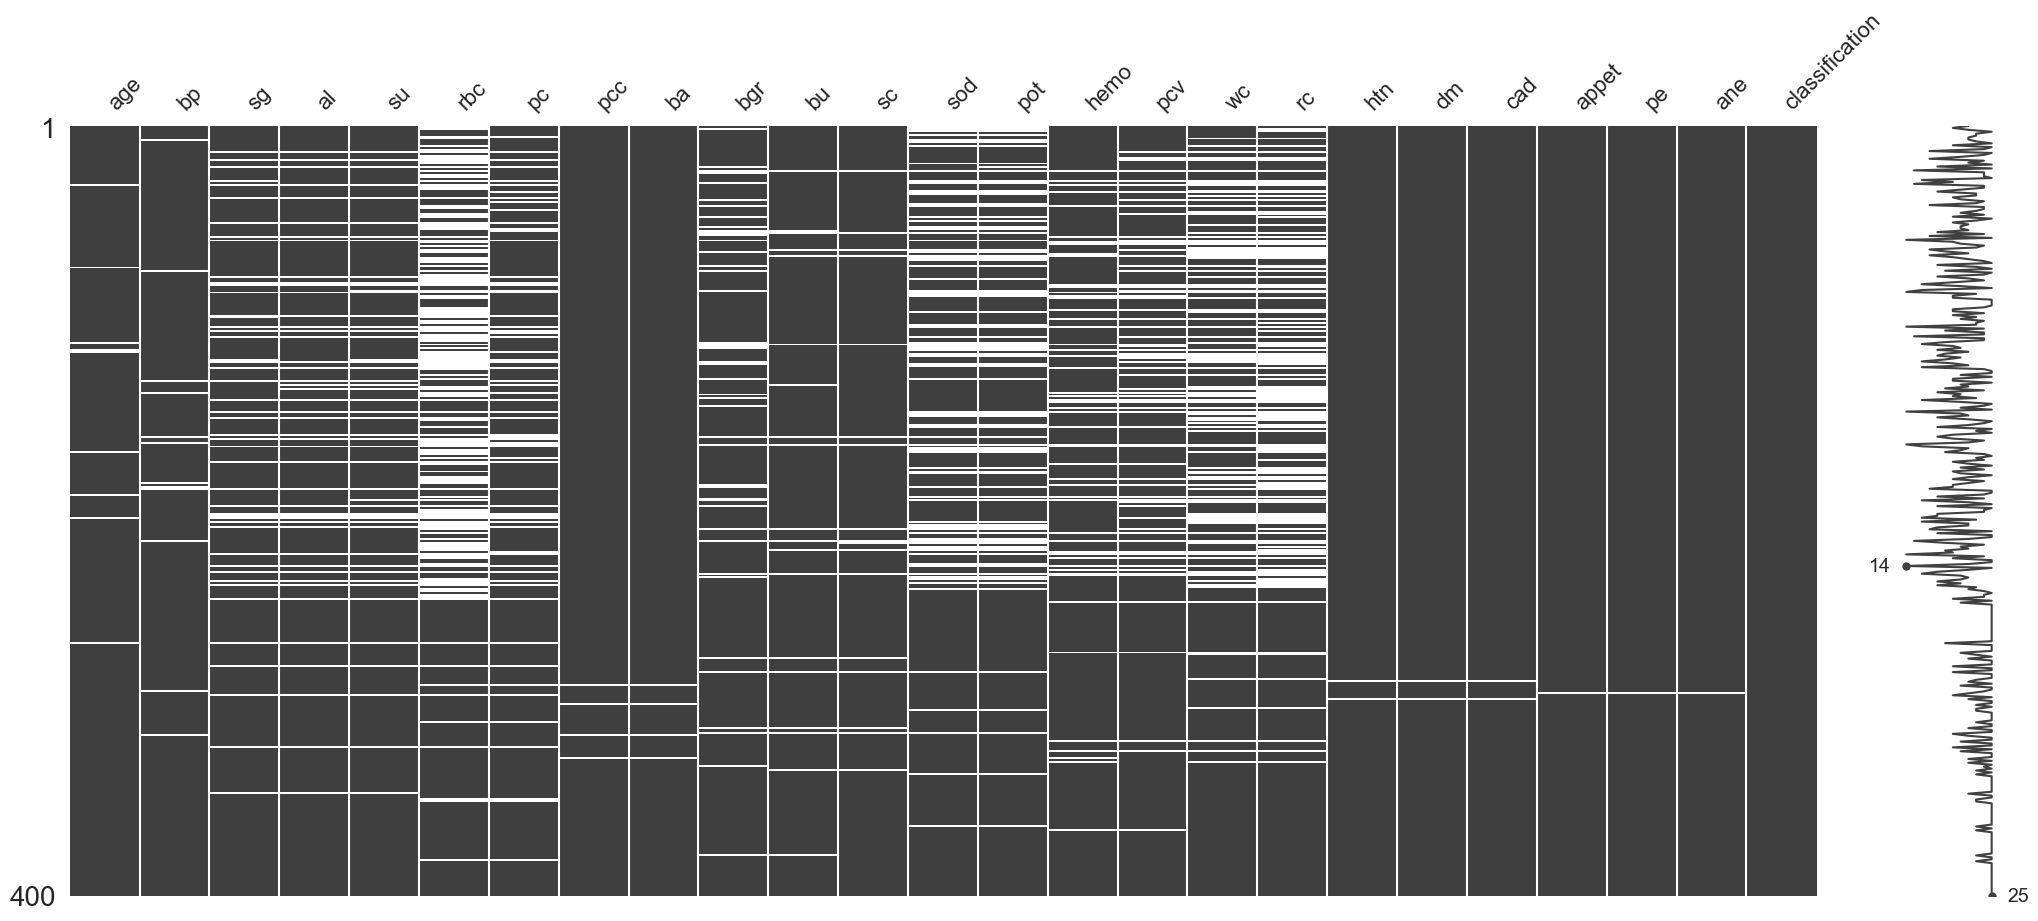

In [6]:
msno.matrix(data)

# Remove null value

In [7]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_i = pd.DataFrame(imp_mode.fit_transform(data))
data_i.columns=data.columns
data_i

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0   1.02  1.0  0.0  normal    normal  notpresent  notpresent   
1     7.0  50.0   1.02  4.0  0.0  normal    normal  notpresent  notpresent   
2    62.0  80.0   1.01  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0   1.01  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0   1.02  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0   1.02  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ... pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0    121.0  ...  44  7800  5.2  yes  yes  no  good   no   no            ckd  
1     99.0  ...  38  6000  5.2   no   no  no  good   no   no            ckd  
2    423.0  ...  31  7500  5.2   no  yes  no  poor   no  yes            ckd  
3    117.0  ...  32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4    106.0  ...  35  7300  4.6   no   no  no  good   no   no            ckd  
..     ...  ...  ..   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...  47  6700  4.9   no   no  no  good   no   no         notckd  
396   75.0  ...  54  7800  6.2   no   no  no  good   no   no         notckd  
397  100.0  ...  49  6600  5.4   no   no  no  good   no   no         notckd  
398  114.0  ...  51  7200  5.9   no   no  no  good   no   no         notckd  
399  131.0  ...  53  6800  6.1   no   no  no  good   no   no         notckd  

[400 rows x 25 columns]

# Check unique value

In [8]:
for i in data_i.columns:
    print("                                                  ",i)
    print()
    print(set(data[i].tolist()))
    print()

                                                   age

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, nan, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, nan, 44.0, 45.0, 46.0, 47.0, 48.0, nan, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, nan, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, nan, 90.0, nan, nan, 43.0, 49.0, nan, 66.0, nan}

                                                   bp

{140.0, nan, nan, nan, nan, nan, nan, 50.0, 180.0, 60.0, nan, nan, nan, 70.0, 80.0, 90.0, nan, 100.0, nan, 110.0, nan, 120.0}

                                                   sg

{1.02, 1.005, 1.015, 1.01, 1.025, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [9]:
print(data_i["rc"].mode())
print(data_i["wc"].mode())
print(data_i["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [10]:
data_i["classification"]=data_i["classification"].apply(lambda x:'ckd' if x=="ckd\t" else x)

data_i["cad"]=data_i["cad"].apply(lambda x:'no' if x=="\tno" else x)

data_i["dm"]=data_i["dm"].apply(lambda x:'no' if x=="\tno" else x)
data_i["dm"]=data_i["dm"].apply(lambda x:'yes' if x=="\tyes" else x)
data_i["dm"]=data_i["dm"].apply(lambda x:'yes' if x==" yes" else x)

data_i["rc"]=data_i["rc"].apply(lambda x:'5.2' if x=="\t?" else x)

data_i["wc"]=data_i["wc"].apply(lambda x:'9800' if x=="\t6200" else x)
data_i["wc"]=data_i["wc"].apply(lambda x:'9800' if x=="\t8400" else x)
data_i["wc"]=data_i["wc"].apply(lambda x:'9800' if x=="\t?" else x)

data_i["pcv"]=data_i["pcv"].apply(lambda x:'41' if x=="\t43" else x)
data_i["pcv"]=data_i["pcv"].apply(lambda x:'41' if x=="\t?" else x)

In [11]:
for i in data_i.columns:
    print("                                                  ",i)
    print()
    print(set(data_i[i].tolist()))
    print()

                                                   age

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0}

                                                   bp

{100.0, 70.0, 140.0, 110.0, 80.0, 50.0, 180.0, 120.0, 90.0, 60.0}

                                                   sg

{1.02, 1.025, 1.005, 1.015, 1.01}

                                                   al

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

                                                   su

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

                                                   rbc

{'abnormal', 'normal'}

                           

# Check data type

In [12]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [13]:
data_i.dtypes

age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

# Fixed data type

In [14]:
for i in data.select_dtypes(exclude=["object"]).columns:
    data_i[i]=data_i[i].apply(lambda x: float(x))

In [15]:
data_i.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Convert into categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
mapping = {'abnormal': 1, 'normal': 0}

data_i['rbc'] = data_i['rbc'].map(mapping)

print("Mapping for 'Red Blood Cells':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Red Blood Cells':
abnormal -> 1
normal -> 0


In [19]:
mapping = {'abnormal': 1, 'normal': 0}

data_i['pc'] = data_i['pc'].map(mapping)

print("Mapping for 'Pus Cell':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Pus Cell':
abnormal -> 1
normal -> 0


In [20]:
mapping = {'present': 1, 'notpresent': 0}

data_i['pcc'] = data_i['pcc'].map(mapping)

print("Mapping for 'Pus Cell clumps':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Pus Cell clumps':
present -> 1
notpresent -> 0


In [21]:
mapping = {'present': 1, 'notpresent': 0}

data_i['ba'] = data_i['ba'].map(mapping)

print("Mapping for 'Bacteria':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Bacteria':
present -> 1
notpresent -> 0


In [22]:
data_i['htn'] = le.fit_transform(data_i['htn'])

In [23]:
# Show the mapping of original values to encoded values
print("Mapping for 'Hypertension':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Hypertension':
no -> 0
yes -> 1


In [24]:
data_i['dm'] = le.fit_transform(data_i['dm'])

In [25]:
# Show the mapping of original values to encoded values
print("Mapping for 'Diabetes Mellitus':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Diabetes Mellitus':
no -> 0
yes -> 1


In [26]:
data_i['cad'] = le.fit_transform(data_i['cad'])

In [27]:
# Show the mapping of original values to encoded values
print("Mapping for 'Coronary Artery Disease':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Coronary Artery Disease':
no -> 0
yes -> 1


In [28]:
data_i['appet'] = le.fit_transform(data_i['appet'])

In [29]:
# Show the mapping of original values to encoded values
print("Mapping for 'Appetite':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Appetite':
good -> 0
poor -> 1


In [30]:
data_i['pe'] = le.fit_transform(data_i['pe'])

In [31]:
# Show the mapping of original values to encoded values
print("Mapping for 'Pedal Edema':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Pedal Edema':
no -> 0
yes -> 1


In [32]:
data_i['ane'] = le.fit_transform(data_i['ane'])

In [33]:
# Show the mapping of original values to encoded values
print("Mapping for 'Anemia':")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value} -> {encoded_value}")

Mapping for 'Anemia':
no -> 0
yes -> 1


In [34]:
mapping = {'ckd': 1, 'notckd': 0}

data_i['classification'] = data_i['classification'].map(mapping)

print("Mapping for 'classification':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value} -> {encoded_value}")

Mapping for 'classification':
ckd -> 1
notckd -> 0


In [35]:
data_i

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv    wc  \
0    48.0  80.0  1.020  1.0  0.0    0   0    0   0  121.0  ...   44  7800   
1     7.0  50.0  1.020  4.0  0.0    0   0    0   0   99.0  ...   38  6000   
2    62.0  80.0  1.010  2.0  3.0    0   0    0   0  423.0  ...   31  7500   
3    48.0  70.0  1.005  4.0  0.0    0   1    1   0  117.0  ...   32  6700   
4    51.0  80.0  1.010  2.0  0.0    0   0    0   0  106.0  ...   35  7300   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0    0   0    0   0  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0    0   0    0   0   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0    0   0    0   0  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0    0   0    0   0  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0    0   0    0   0  131.0  ...   53  6800   

      rc  htn  dm cad appet pe  ane  classification  
0    5.2    1   1   0     0  0    0               1  
1    5.2    0   0   0     0  0    0               1  
2    5.2    0   1   0     1  0    1               1  
3    3.9    1   0   0     1  1    1               1  
4    4.6    0   0   0     0  0    0               1  
..   ...  ...  ..  ..   ... ..  ...             ...  
395  4.9    0   0   0     0  0    0               0  
396  6.2    0   0   0     0  0    0               0  
397  5.4    0   0   0     0  0    0               0  
398  5.9    0   0   0     0  0    0               0  
399  6.1    0   0   0     0  0    0               0  

[400 rows x 25 columns]

<Axes: >

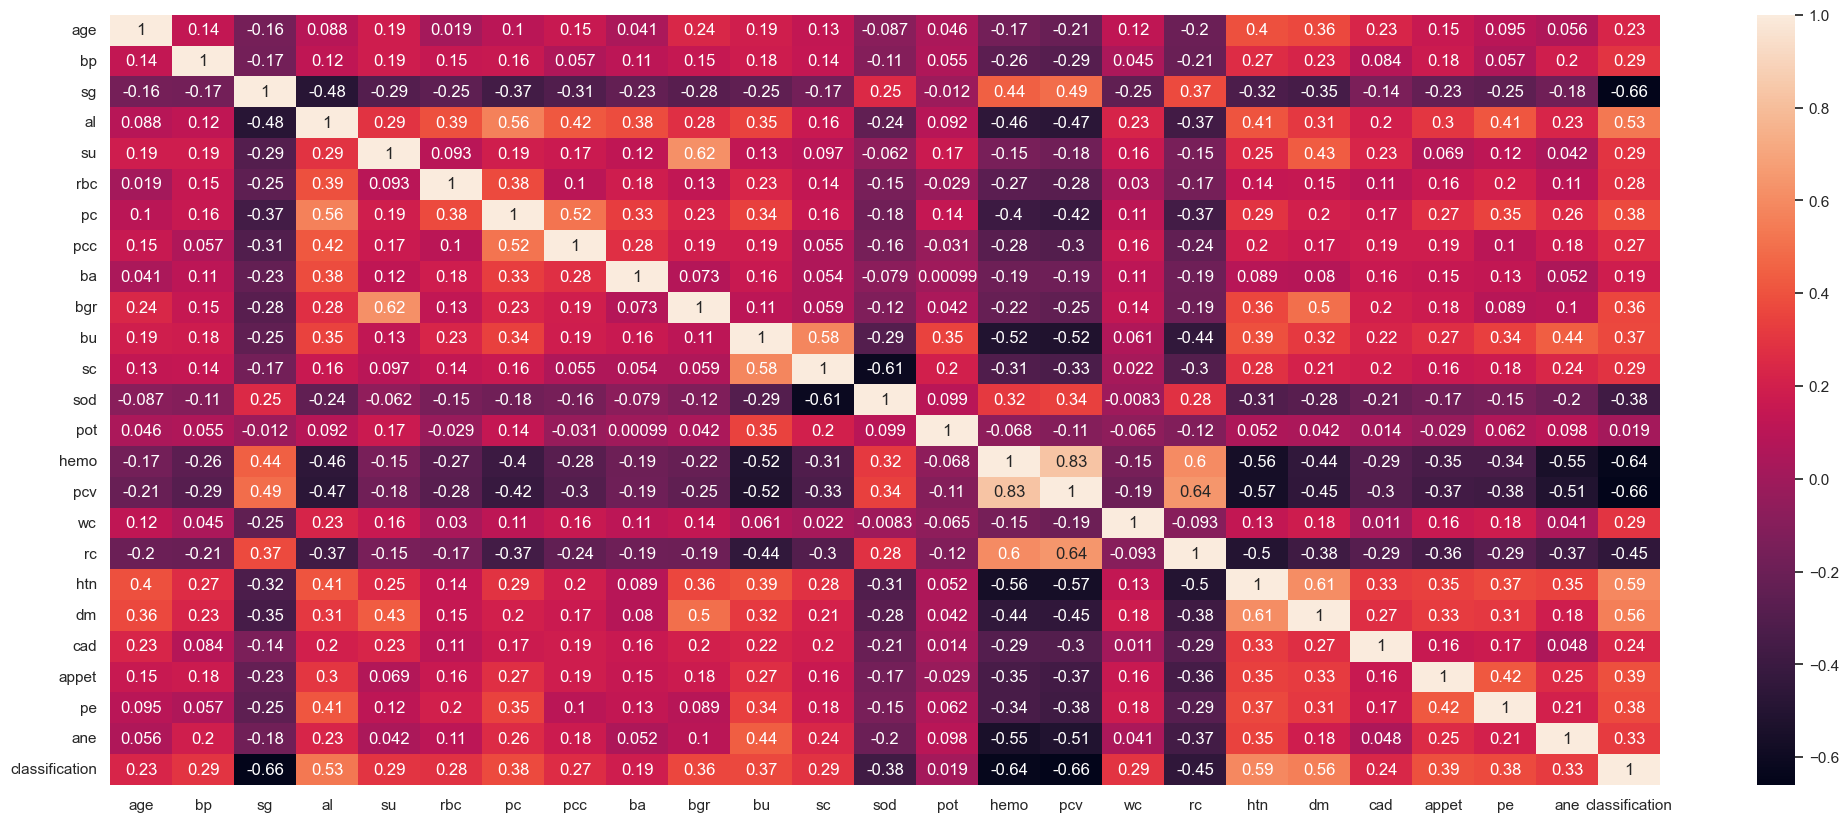

In [36]:
plt.figure(figsize=(25,10))
corr=data_i.corr()
sns.heatmap(corr,annot=True)

# Feature selection using RandomForestClassifier

In [37]:
f1 = data_i.iloc[:,:-1]
f2 = data_i.iloc[:,24]

In [38]:
f1.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo  pcv    wc  \
0  48.0  80.0  1.020  1.0  0.0    0   0    0   0  121.0  ...  15.4   44  7800   
1   7.0  50.0  1.020  4.0  0.0    0   0    0   0   99.0  ...  11.3   38  6000   
2  62.0  80.0  1.010  2.0  3.0    0   0    0   0  423.0  ...   9.6   31  7500   
3  48.0  70.0  1.005  4.0  0.0    0   1    1   0  117.0  ...  11.2   32  6700   
4  51.0  80.0  1.010  2.0  0.0    0   0    0   0  106.0  ...  11.6   35  7300   

    rc  htn dm cad appet  pe  ane  
0  5.2    1  1   0     0   0    0  
1  5.2    0  0   0     0   0    0  
2  5.2    0  1   0     1   0    1  
3  3.9    1  0   0     1   1    1  
4  4.6    0  0   0     0   0    0  

[5 rows x 24 columns]

In [39]:
f2.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(f1, f2, test_size=0.3, random_state=42)


In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [44]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': f1.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
11      sc    0.195522
15     pcv    0.152461
2       sg    0.120226
14    hemo    0.099063
3       al    0.075278
19      dm    0.058445
17      rc    0.053980
18     htn    0.044595
12     sod    0.033841
10      bu    0.028679
9      bgr    0.025575
16      wc    0.023604
0      age    0.018156
13     pot    0.017909
1       bp    0.014317
21   appet    0.011964
22      pe    0.009063
4       su    0.006316
6       pc    0.004896
23     ane    0.003694
5      rbc    0.001679
8       ba    0.000523
7      pcc    0.000142
20     cad    0.000072


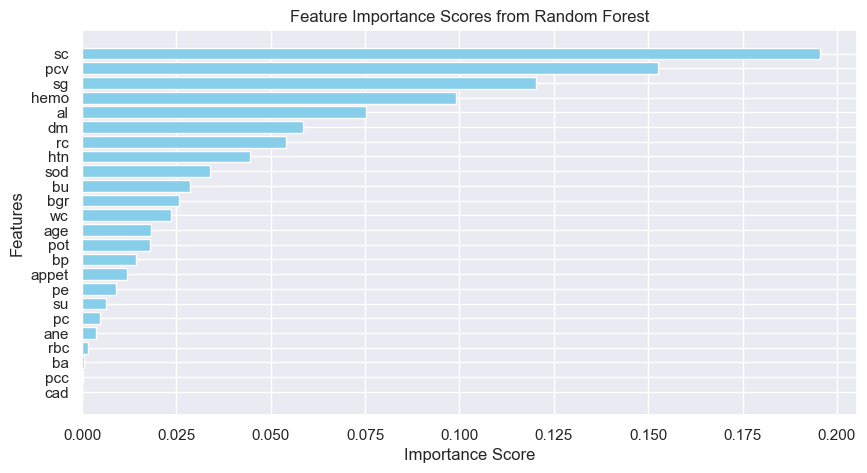

In [45]:

plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [46]:
data_i.drop(['ane','rbc','ba','pcc','cad'],axis=1,inplace=True)
data_u = data_i
data_u

age    bp     sg   al   su  pc    bgr    bu   sc    sod  pot  hemo pcv  \
0    48.0  80.0  1.020  1.0  0.0   0  121.0  36.0  1.2  135.0  3.5  15.4  44   
1     7.0  50.0  1.020  4.0  0.0   0   99.0  18.0  0.8  135.0  3.5  11.3  38   
2    62.0  80.0  1.010  2.0  3.0   0  423.0  53.0  1.8  135.0  3.5   9.6  31   
3    48.0  70.0  1.005  4.0  0.0   1  117.0  56.0  3.8  111.0  2.5  11.2  32   
4    51.0  80.0  1.010  2.0  0.0   0  106.0  26.0  1.4  135.0  3.5  11.6  35   
..    ...   ...    ...  ...  ...  ..    ...   ...  ...    ...  ...   ...  ..   
395  55.0  80.0  1.020  0.0  0.0   0  140.0  49.0  0.5  150.0  4.9  15.7  47   
396  42.0  70.0  1.025  0.0  0.0   0   75.0  31.0  1.2  141.0  3.5  16.5  54   
397  12.0  80.0  1.020  0.0  0.0   0  100.0  26.0  0.6  137.0  4.4  15.8  49   
398  17.0  60.0  1.025  0.0  0.0   0  114.0  50.0  1.0  135.0  4.9  14.2  51   
399  58.0  80.0  1.025  0.0  0.0   0  131.0  18.0  1.1  141.0  3.5  15.8  53   

       wc   rc  htn  dm  appet  pe  classification  
0    7800  5.2    1   1      0   0               1  
1    6000  5.2    0   0      0   0               1  
2    7500  5.2    0   1      1   0               1  
3    6700  3.9    1   0      1   1               1  
4    7300  4.6    0   0      0   0               1  
..    ...  ...  ...  ..    ...  ..             ...  
395  6700  4.9    0   0      0   0               0  
396  7800  6.2    0   0      0   0               0  
397  6600  5.4    0   0      0   0               0  
398  7200  5.9    0   0      0   0               0  
399  6800  6.1    0   0      0   0               0  

[400 rows x 20 columns]

# Train Test spilt

In [47]:
x = data_u.iloc[:,:-1]
x

age    bp     sg   al   su  pc    bgr    bu   sc    sod  pot  hemo pcv  \
0    48.0  80.0  1.020  1.0  0.0   0  121.0  36.0  1.2  135.0  3.5  15.4  44   
1     7.0  50.0  1.020  4.0  0.0   0   99.0  18.0  0.8  135.0  3.5  11.3  38   
2    62.0  80.0  1.010  2.0  3.0   0  423.0  53.0  1.8  135.0  3.5   9.6  31   
3    48.0  70.0  1.005  4.0  0.0   1  117.0  56.0  3.8  111.0  2.5  11.2  32   
4    51.0  80.0  1.010  2.0  0.0   0  106.0  26.0  1.4  135.0  3.5  11.6  35   
..    ...   ...    ...  ...  ...  ..    ...   ...  ...    ...  ...   ...  ..   
395  55.0  80.0  1.020  0.0  0.0   0  140.0  49.0  0.5  150.0  4.9  15.7  47   
396  42.0  70.0  1.025  0.0  0.0   0   75.0  31.0  1.2  141.0  3.5  16.5  54   
397  12.0  80.0  1.020  0.0  0.0   0  100.0  26.0  0.6  137.0  4.4  15.8  49   
398  17.0  60.0  1.025  0.0  0.0   0  114.0  50.0  1.0  135.0  4.9  14.2  51   
399  58.0  80.0  1.025  0.0  0.0   0  131.0  18.0  1.1  141.0  3.5  15.8  53   

       wc   rc  htn  dm  appet  pe  
0    7800  5.2    1   1      0   0  
1    6000  5.2    0   0      0   0  
2    7500  5.2    0   1      1   0  
3    6700  3.9    1   0      1   1  
4    7300  4.6    0   0      0   0  
..    ...  ...  ...  ..    ...  ..  
395  6700  4.9    0   0      0   0  
396  7800  6.2    0   0      0   0  
397  6600  5.4    0   0      0   0  
398  7200  5.9    0   0      0   0  
399  6800  6.1    0   0      0   0  

[400 rows x 19 columns]

In [48]:
y = data_u.iloc[:,19]
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [51]:
xtrain

age     bp     sg   al   su  pc    bgr     bu   sc    sod  pot  hemo  \
3    48.0   70.0  1.005  4.0  0.0   1  117.0   56.0  3.8  111.0  2.5  11.2   
18   60.0  100.0  1.025  0.0  3.0   0  263.0   27.0  1.3  135.0  4.3  12.7   
202  78.0   60.0  1.020  0.0  0.0   0  114.0   74.0  2.9  135.0  5.9   8.0   
250  40.0   80.0  1.025  0.0  0.0   0  140.0   10.0  1.2  135.0  5.0  15.0   
274  19.0   80.0  1.020  0.0  0.0   0  107.0   23.0  0.7  141.0  4.2  14.4   
..    ...    ...    ...  ...  ...  ..    ...    ...  ...    ...  ...   ...   
71   46.0   60.0  1.010  1.0  0.0   0  163.0   92.0  3.3  141.0  4.0   9.8   
106  50.0   90.0  1.020  0.0  0.0   0   89.0  118.0  6.1  127.0  4.4   6.0   
270  23.0   80.0  1.025  0.0  0.0   0  111.0   34.0  1.1  145.0  4.0  14.3   
348  38.0   80.0  1.020  0.0  0.0   0   99.0   19.0  0.5  147.0  3.5  13.6   
102  17.0   60.0  1.010  0.0  0.0   0   92.0   32.0  2.1  141.0  4.2  13.9   

    pcv     wc   rc  htn  dm  appet  pe  
3    32   6700  3.9    1   0      1   1  
18   37  11400  4.3    1   1      0   0  
202  24   9800  5.2    0   1      0   0  
250  48  10400  4.5    0   0      0   0  
274  44   9800  5.2    0   0      0   0  
..   ..    ...  ...  ...  ..    ...  ..  
71   28  14600  3.2    1   1      0   0  
106  17   6500  5.2    1   1      0   1  
270  41   7200    5    0   0      0   0  
348  44   7300  6.4    0   0      0   0  
102  52   7000  5.2    0   0      0   0  

[320 rows x 19 columns]

In [52]:
ytrain

3      1
18     1
202    1
250    0
274    0
      ..
71     1
106    1
270    0
348    0
102    1
Name: classification, Length: 320, dtype: int64

In [53]:
xtest

age     bp     sg   al   su  pc    bgr     bu    sc    sod  pot  hemo  \
209  19.0   70.0  1.020  0.0  0.0   0   99.0   46.0   1.2  135.0  3.5  11.5   
280  47.0   80.0  1.020  0.0  0.0   0   93.0   33.0   0.9  144.0  4.5  13.3   
33   60.0  100.0  1.020  2.0  0.0   1  140.0   55.0   2.5  135.0  3.5  10.1   
210  59.0  100.0  1.015  4.0  2.0   0  255.0  132.0  12.8  135.0  5.7   7.3   
93   73.0  100.0  1.010  3.0  2.0   1  295.0   90.0   5.6  140.0  2.9   9.2   
..    ...    ...    ...  ...  ...  ..    ...    ...   ...    ...  ...   ...   
246  48.0  110.0  1.015  3.0  0.0   0  106.0  215.0  15.2  120.0  5.7   8.6   
227  57.0   80.0  1.015  0.0  0.0   0  120.0   48.0   1.6  135.0  3.5  11.3   
369  75.0   70.0  1.020  0.0  0.0   0  107.0   48.0   0.8  144.0  3.5  13.6   
176  21.0   90.0  1.010  4.0  0.0   1  107.0   40.0   1.7  125.0  3.5   8.3   
289  42.0   70.0  1.020  0.0  0.0   0   93.0   32.0   0.9  143.0  4.7  16.6   

    pcv     wc   rc  htn  dm  appet  pe  
209  41   6900  5.2    0   0      0   0  
280  52   8100  5.2    0   0      0   0  
33   29   9800  5.2    1   0      1   0  
210  20   9800  3.9    1   1      0   0  
93   30   7000  3.2    1   1      1   0  
..   ..    ...  ...  ...  ..    ...  ..  
246  26   5000  2.5    1   0      0   0  
227  36   7200  3.8    1   1      0   0  
369  46  10300  4.8    0   0      0   0  
176  23  12400  3.9    0   0      0   0  
289  43   7100  5.3    0   0      0   0  

[80 rows x 19 columns]

In [54]:
ytest

209    1
280    0
33     1
210    1
93     1
      ..
246    1
227    1
369    0
176    1
289    0
Name: classification, Length: 80, dtype: int64

In [55]:
print("Training data :", xtrain.shape[0])
print("Training labels :", ytrain.shape[0])
print("Testing data :", xtest.shape[0])
print("Testing labels :", ytest.shape[0])

Training data : 320
Training labels : 320
Testing data : 80
Testing labels : 80


In [56]:
import plotly.express as px
Classification_Pie= ytest.value_counts()
transactions = Classification_Pie.index
quantity = Classification_Pie.values

figure = px.pie(ytest,
            values=quantity,
            names=transactions, hole = .60,
            title ="Classification_CKD-Pie Chart : "
               )
figure.show()

In [57]:
# xtest.to_csv("CKD_Xtest_Data.csv")

In [58]:
# ytest.to_csv("CKD_Ytest_Data.csv")

# Locked_Data

In [59]:
from copy import deepcopy
xtrain = deepcopy(xtrain)
ytrain = deepcopy(ytrain)
xtest = deepcopy(xtest)
ytest = deepcopy(ytest)

# Fit ML Model

# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
RFclf = RandomForestClassifier(n_estimators=100,random_state=42)

In [62]:
RFclf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [63]:
import pickle

# Saving the model to a file
with open('ckd_model.pkl', 'wb') as model_file:
    pickle.dump(RFclf, model_file)


In [64]:
RFclf.score(xtest,ytest)

1.0

In [65]:
RFclf_y_pred =RFclf.predict(xtest)

In [66]:
RFclf_confusion_matrix = confusion_matrix(ytest,RFclf_y_pred)
RFclf_confusion_matrix

array([[28,  0],
       [ 0, 52]], dtype=int64)

Text(54.75, 0.5, 'Truth')

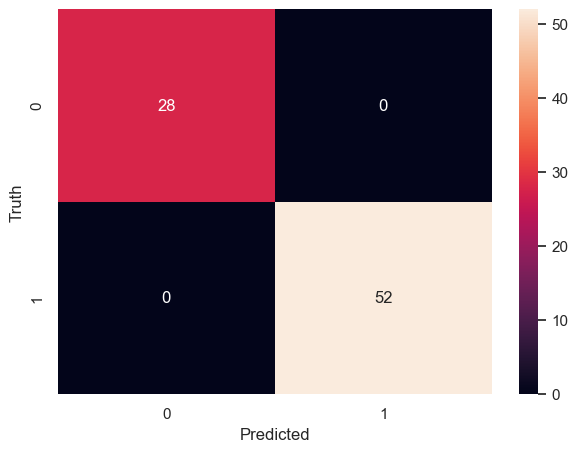

In [67]:
plt.figure(figsize=(7,5))
sns.heatmap(RFclf_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
print(classification_report(ytest,RFclf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [69]:
TP = RFclf_confusion_matrix[1][1]
FN = RFclf_confusion_matrix[1][0]
FP = RFclf_confusion_matrix[0][1]
TN = RFclf_confusion_matrix[0][0]

print ("True_Positive : ",TP)
print ("False_Positive : ",FP)
print ("False_Negative : ",FN)
print ("True_Negative : ",TN)

True_Positive :  52
False_Positive :  0
False_Negative :  0
True_Negative :  28


In [70]:
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
fnr = 1-tpr
tnr = TN / (TN + FP)

print("True Positive Rate (TPR): ",tpr)
print("False Positive Rate (FPR): ",fpr)
print("False Negative Rate (FNR): ",fnr)
print("True Negative Rate (TNR): ",tnr)

True Positive Rate (TPR):  1.0
False Positive Rate (FPR):  0.0
False Negative Rate (FNR):  0.0
True Negative Rate (TNR):  1.0


AUC :  1.0


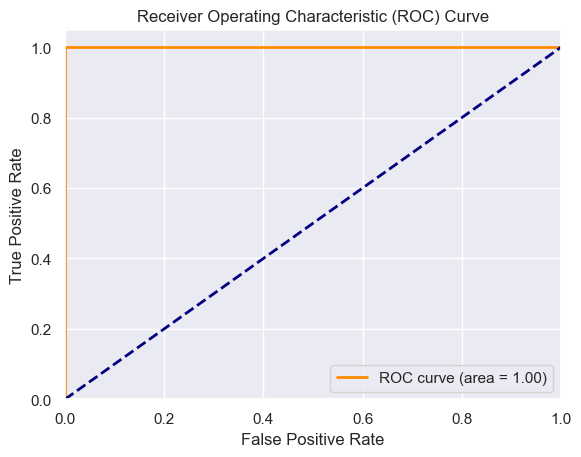

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = RFclf.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_prob)

roc_auc = roc_auc_score(ytest, y_prob)
print ("AUC : ",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
DTclf = DecisionTreeClassifier(random_state=42)

In [74]:
DTclf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [75]:
DTclf.score(xtest,ytest)

0.975

In [76]:
DTclf_y_pred =DTclf.predict(xtest)
DTclf_confusion_matrix = confusion_matrix(ytest,DTclf_y_pred)
DTclf_confusion_matrix

array([[27,  1],
       [ 1, 51]], dtype=int64)

Text(54.75, 0.5, 'Truth')

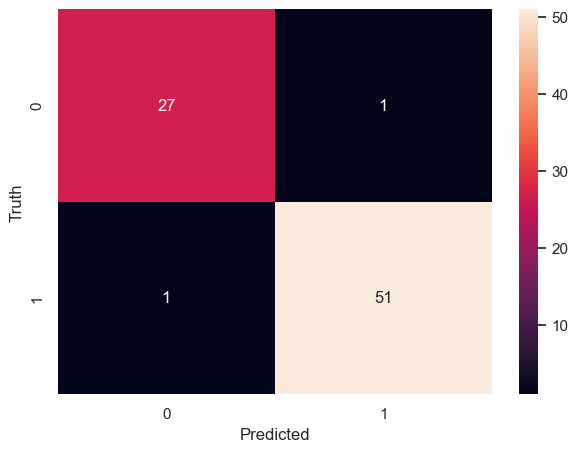

In [77]:
plt.figure(figsize=(7,5))
sns.heatmap(DTclf_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
print(classification_report(ytest,DTclf_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [79]:
TP = DTclf_confusion_matrix[1][1]
FN = DTclf_confusion_matrix[1][0]
FP = DTclf_confusion_matrix[0][1]
TN = DTclf_confusion_matrix[0][0]

print ("True_Positive : ",TP)
print ("False_Positive : ",FP)
print ("False_Negative : ",FN)
print ("True_Negative : ",TN)

True_Positive :  51
False_Positive :  1
False_Negative :  1
True_Negative :  27


In [80]:
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
fnr = 1-tpr
tnr = TN / (TN + FP)

print("True Positive Rate (TPR): ",tpr)
print("False Positive Rate (FPR): ",fpr)
print("False Negative Rate (FNR): ",fnr)
print("True Negative Rate (TNR): ",tnr)

True Positive Rate (TPR):  0.9807692307692307
False Positive Rate (FPR):  0.03571428571428571
False Negative Rate (FNR):  0.019230769230769273
True Negative Rate (TNR):  0.9642857142857143


AUC :  0.9725274725274726


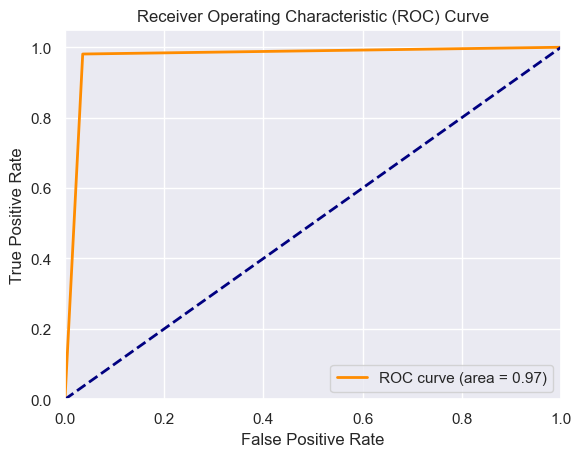

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = DTclf.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_prob)

roc_auc = roc_auc_score(ytest, y_prob)
print ("AUC : ",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ExtraTreeClassifier

In [82]:
from sklearn.tree import ExtraTreeClassifier

In [83]:
ETclf = ExtraTreeClassifier(random_state=42)

In [84]:
ETclf.fit(xtrain,ytrain)

ExtraTreeClassifier(random_state=42)

In [85]:
ETclf.score(xtest,ytest)

0.9875

In [86]:
ETclf_y_pred =ETclf.predict(xtest)
ETclf_confusion_matrix = confusion_matrix(ytest,ETclf_y_pred)
ETclf_confusion_matrix

array([[28,  0],
       [ 1, 51]], dtype=int64)

Text(54.75, 0.5, 'Truth')

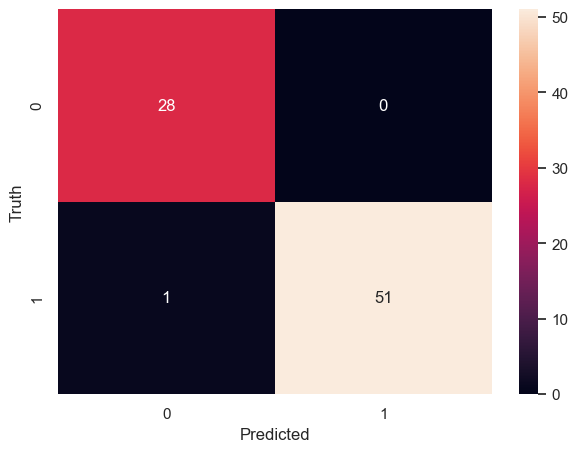

In [87]:
plt.figure(figsize=(7,5))
sns.heatmap(ETclf_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
print(classification_report(ytest,ETclf_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [89]:
TP = ETclf_confusion_matrix[1][1]
FN = ETclf_confusion_matrix[1][0]
FP = ETclf_confusion_matrix[0][1]
TN = ETclf_confusion_matrix[0][0]

print ("True_Positive : ",TP)
print ("False_Positive : ",FP)
print ("False_Negative : ",FN)
print ("True_Negative : ",TN)

True_Positive :  51
False_Positive :  0
False_Negative :  1
True_Negative :  28


In [90]:
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
fnr = 1-tpr
tnr = TN / (TN + FP)

print("True Positive Rate (TPR): ",tpr)
print("False Positive Rate (FPR): ",fpr)
print("False Negative Rate (FNR): ",fnr)
print("True Negative Rate (TNR): ",tnr)

True Positive Rate (TPR):  0.9807692307692307
False Positive Rate (FPR):  0.0
False Negative Rate (FNR):  0.019230769230769273
True Negative Rate (TNR):  1.0


AUC :  0.9903846153846154


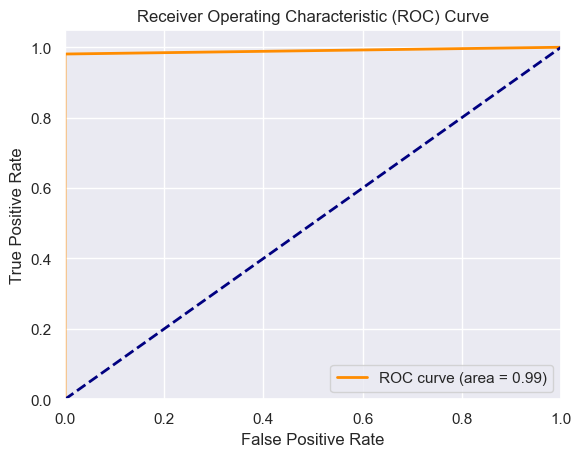

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = ETclf.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_prob)

roc_auc = roc_auc_score(ytest, y_prob)
print ("AUC : ",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ADclf = AdaBoostClassifier(random_state=42)

In [94]:
ADclf.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=42)

In [95]:
ADclf.score(xtest,ytest)

1.0

In [96]:
ADclf_y_pred =ADclf.predict(xtest)
ADclf_confusion_matrix = confusion_matrix(ytest,ADclf_y_pred)
ADclf_confusion_matrix

array([[28,  0],
       [ 0, 52]], dtype=int64)

Text(54.75, 0.5, 'Truth')

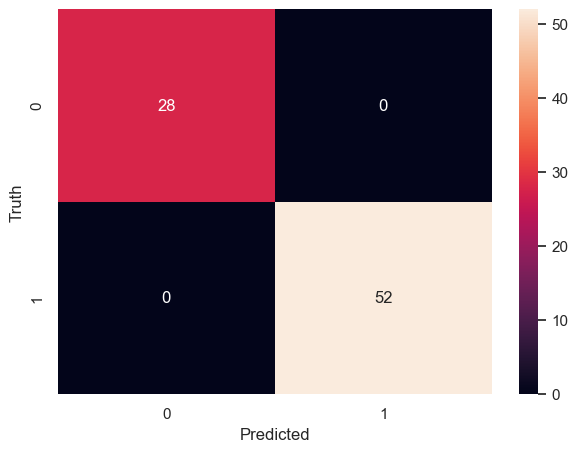

In [97]:
plt.figure(figsize=(7,5))
sns.heatmap(ADclf_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
print(classification_report(ytest,ADclf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [99]:
TP = ADclf_confusion_matrix[1][1]
FN = ADclf_confusion_matrix[1][0]
FP = ADclf_confusion_matrix[0][1]
TN = ADclf_confusion_matrix[0][0]

print ("True_Positive : ",TP)
print ("False_Positive : ",FP)
print ("False_Negative : ",FN)
print ("True_Negative : ",TN)

True_Positive :  52
False_Positive :  0
False_Negative :  0
True_Negative :  28


In [100]:
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
fnr = 1-tpr
tnr = TN / (TN + FP)

print("True Positive Rate (TPR): ",tpr)
print("False Positive Rate (FPR): ",fpr)
print("False Negative Rate (FNR): ",fnr)
print("True Negative Rate (TNR): ",tnr)

True Positive Rate (TPR):  1.0
False Positive Rate (FPR):  0.0
False Negative Rate (FNR):  0.0
True Negative Rate (TNR):  1.0


AUC :  1.0


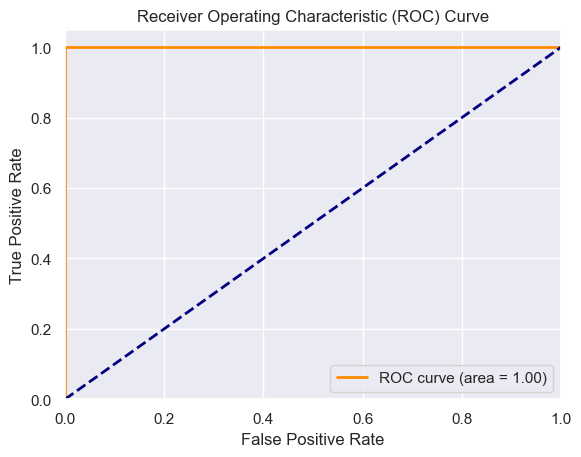

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = ADclf.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_prob)

roc_auc = roc_auc_score(ytest, y_prob)
print ("AUC : ",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machines (SVM)

In [102]:
from sklearn.svm import SVC

In [103]:
svm_model = SVC(probability=True,kernel='linear', random_state=42)

In [104]:
svm_model.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [105]:
svm_model.score(xtest,ytest)

0.9625

In [106]:
svm_model_y_pred =svm_model.predict(xtest)
svm_model_confusion_matrix = confusion_matrix(ytest,svm_model_y_pred)
svm_model_confusion_matrix

array([[27,  1],
       [ 2, 50]], dtype=int64)

Text(54.75, 0.5, 'Truth')

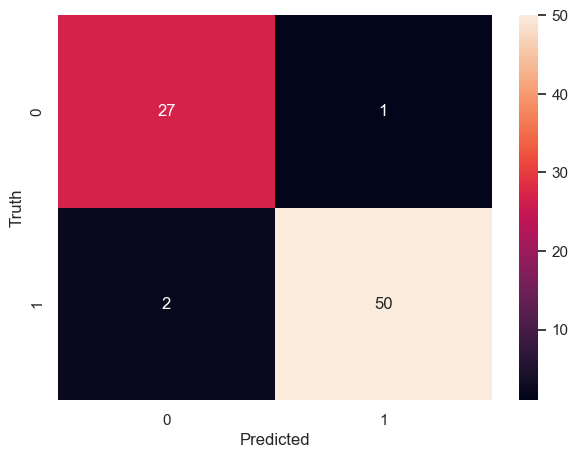

In [107]:
plt.figure(figsize=(7,5))
sns.heatmap(svm_model_confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [108]:
print(classification_report(ytest,svm_model_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [109]:
TP = svm_model_confusion_matrix[1][1]
FN = svm_model_confusion_matrix[1][0]
FP = svm_model_confusion_matrix[0][1]
TN = svm_model_confusion_matrix[0][0]

print ("True_Positive : ",TP)
print ("False_Positive : ",FP)
print ("False_Negative : ",FN)
print ("True_Negative : ",TN)

True_Positive :  50
False_Positive :  1
False_Negative :  2
True_Negative :  27


In [110]:
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
fnr = 1-tpr
tnr = TN / (TN + FP)

print("True Positive Rate (TPR): ",tpr)
print("False Positive Rate (FPR): ",fpr)
print("False Negative Rate (FNR): ",fnr)
print("True Negative Rate (TNR): ",tnr)

True Positive Rate (TPR):  0.9615384615384616
False Positive Rate (FPR):  0.03571428571428571
False Negative Rate (FNR):  0.038461538461538436
True Negative Rate (TNR):  0.9642857142857143


AUC :  0.9979395604395604


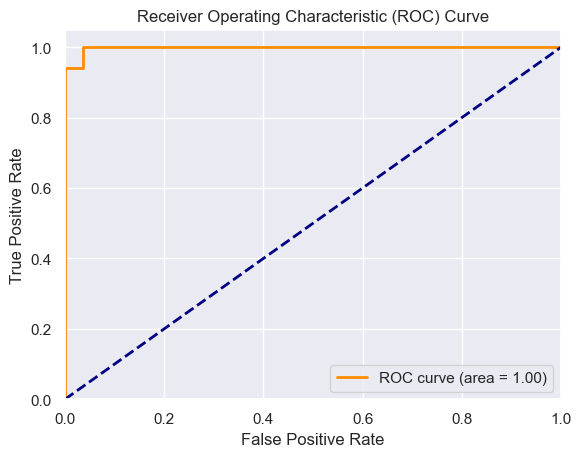

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = svm_model.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_prob)

roc_auc = roc_auc_score(ytest, y_prob)
print ("AUC : ",roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare with Others Model

In [112]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def calculate_rates(conf_matrix):
    TP = conf_matrix[1][1]
    FN = conf_matrix[1][0]
    FP = conf_matrix[0][1]
    TN = conf_matrix[0][0]
    
    tpr = TP / (TP + FN)  
    fpr = FP / (FP + TN)  
    fnr = 1 - tpr        
    tnr = TN / (TN + FP) 
    
    return tpr, fpr, fnr, tnr

def compare_models(models, x_test, y_test):
    results = {}
    
    for name, model in models.items():
        y_pred = model.predict(x_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tpr, fpr, fnr, tnr = calculate_rates(conf_matrix)
        
        results[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'TPR': tpr,
            'FPR': fpr,
            'FNR': fnr,
            'TNR': tnr
        }
    
    return results

models = {
    'Random Forest': RFclf,
    'Decision Tree': DTclf,
    'Extra Tree': ETclf,
    'AdaBoost': ADclf,
    'SVM': svm_model
}

results = compare_models(models, xtest, ytest)

best_model = max(results, key=lambda x: (results[x]['Precision'], results[x]['Recall'], results[x]['F1-Score']))
print(f"\nBest model based on Precision, Recall, and F1-Score: {best_model}")

df_performance = pd.DataFrame(results).T

df_performance['Best Model'] = df_performance.index == best_model
df_performance.style.apply(lambda x: ['background-color: yellow' if x['Best Model'] else '' for i in x], axis=1)


Best model based on Precision, Recall, and F1-Score: Random Forest


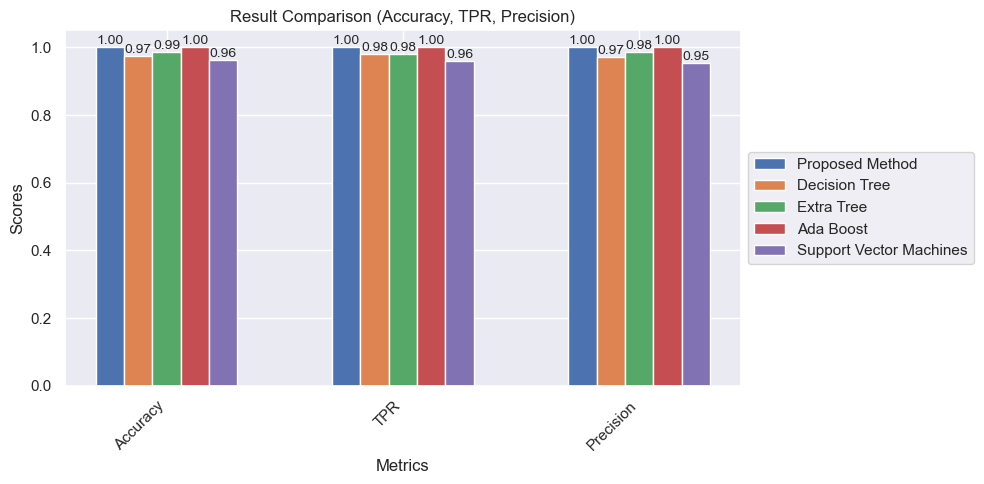

In [113]:
categories = ['Accuracy', 'TPR', 'Precision']
model_names = ['Proposed Method', 'Decision Tree', 'Extra Tree','Ada Boost','Support Vector Machines']

results = {
    'Proposed Method': [1.0 , 1.0 , 1.0 ],
    'Decision Tree': [0.975, 0.98, 0.97],
    'Extra Tree': [0.987, 0.98, 0.985],
    'Ada Boost': [1.0 , 1.0 , 1.0],
    'Support Vector Machines': [0.962, 0.961, 0.955]
    
}

num_models = len(model_names)
num_categories = len(categories)

bar_width = 0.12
index = np.arange(num_categories)

plt.figure(figsize=(10, 5))

for i, model_name in enumerate(model_names):
    bars = plt.bar(index + i * bar_width, results[model_name], bar_width, label=model_name)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Result Comparison (Accuracy, TPR, Precision)')

plt.xticks(index + bar_width * (num_models - 1) / 2, categories)
plt.gca().set_xticklabels(categories, rotation=45, ha='right')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

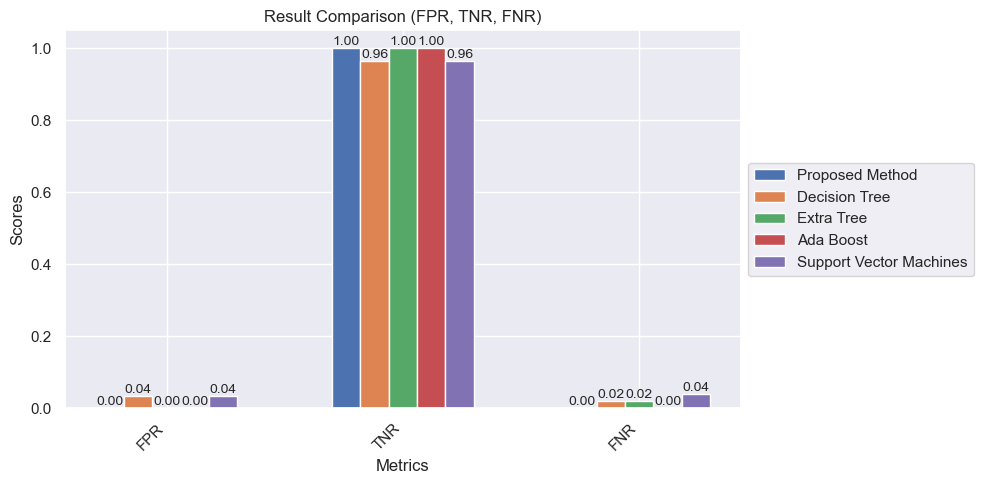

In [114]:
categories = ['FPR', 'TNR', 'FNR']
model_names = ['Proposed Method', 'Decision Tree', 'Extra Tree','Ada Boost','Support Vector Machines']

results = {
    'Proposed Method': [0.0 , 1.0 , 0.0 ],
    'Decision Tree': [0.035, 0.964, 0.019],
    'Extra Tree': [0.0, 1.0, 0.019],
    'Ada Boost': [0.0 , 1.0 , 0.0],
    'Support Vector Machines': [0.035, 0.964, 0.038]
    
}

num_models = len(model_names)
num_categories = len(categories)

bar_width = 0.12
index = np.arange(num_categories)

plt.figure(figsize=(10, 5))

for i, model_name in enumerate(model_names):
    bars = plt.bar(index + i * bar_width, results[model_name], bar_width, label=model_name)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Result Comparison (FPR, TNR, FNR)')

plt.xticks(index + bar_width * (num_models - 1) / 2, categories)
plt.gca().set_xticklabels(categories, rotation=45, ha='right')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [115]:
import time

models = {
    'Random Forest': RFclf,
    'AdaBoost': ADclf,
}

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(xtrain, ytrain)
    end_time = time.time()
    training_times[name] = end_time - start_time


rf_params = {'n_estimators': 100, 'max_depth': None}
ab_params = {'n_estimators': 50, 'learning_rate': 1.0}

model_params = {
    'Random Forest': {'Training Time (s)': training_times['Random Forest'], 'Number of Estimators': rf_params['n_estimators'], 'Max Depth': rf_params['max_depth'], 'Learning Rate': 'N/A'},
    'AdaBoost': {'Training Time (s)': training_times['AdaBoost'], 'Number of Estimators': ab_params['n_estimators'], 'Max Depth': 'N/A', 'Learning Rate': ab_params['learning_rate']},
}

comparison_df = pd.DataFrame(model_params).T
comparison_df

Training Time (s) Number of Estimators Max Depth Learning Rate
Random Forest          0.242446                  100      None           N/A
AdaBoost               0.175053                   50       N/A           1.0

# Checking Overfitted & Underfitted

# Compare Training and Testing Scores

In [116]:
print ("RandomForestClassifier")
train_accuracy = RFclf.score(xtrain, ytrain)
test_accuracy = RFclf.score(xtest, ytest)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0


# Cross-Validation

In [117]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RFclf, xtrain, ytrain, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


# Learning Curves

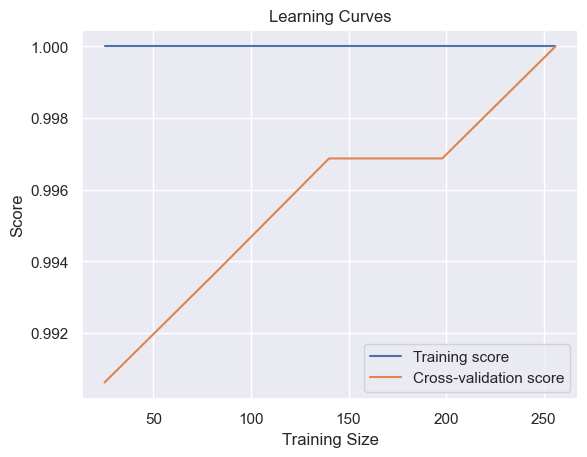

In [118]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RFclf,xtrain, ytrain, cv=5, n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Model Complexity

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}


# Bias-Variance Tradeoff

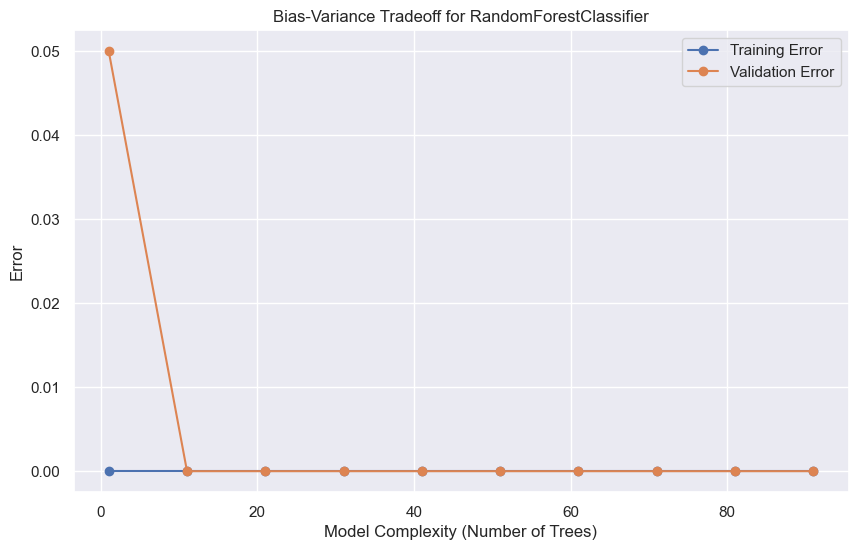

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (for classification)
np.random.seed(0)
x = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = (np.sin(x).ravel() > 0).astype(int)  # Convert regression output to binary classification

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

train_errors = []
val_errors = []
n_estimators_range = range(1, 101, 10)  # Varying the number of trees in the forest

for n_estimators in n_estimators_range:
    # Train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate errors
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))  # Error = 1 - Accuracy
    val_errors.append(1 - accuracy_score(y_val, y_val_pred))

# Plotting the bias-variance tradeoff graph
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label="Training Error", marker='o')
plt.plot(n_estimators_range, val_errors, label="Validation Error", marker='o')
plt.xlabel("Model Complexity (Number of Trees)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff for RandomForestClassifier")
plt.legend()
plt.show()
